# Import libaries

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# Import dataset

In [47]:
data = pd.read_excel("C:/Users/ASUS/Desktop/dataset/dataset_influenceurs_final.xlsx")
data.head(10)

,Unnamed: 0,username,subscriptions,subscribers,likes,descriptions,E-mail,localisation,External-URL
0,0,@meredithduxbury,399,15600000.0,511000000.0,💄 MUA 💄\nIg: @meredithduxbury,NaN,,NaN
1,1,@noeminikita,319,13400000.0,326400000.0,noeminikita@bwm-com.com\nInstagram: noeminikit...,"noeminikita@bwm-com.com ,",,NaN
2,2,@mikaylanogueira,138,13000000.0,882100000.0,MUA | 24 | Masshole | Why aren’t you following...,NaN,,NaN
3,4,@nadina_ioana,24,11600000.0,227400000.0,Business: contact@nadinaioana.com\nMy official...,"contact@nadinaioana.com ,",,NaN
4,6,@kaelimaee,202,9600000.0,288000000.0,new apartment tour on my YT!!\nsd • 🕊🌿\nkaeli@...,"kaeli@palettemgmt.com ,",,NaN
5,7,@benoit_chevalier,2818,9500000.0,477400000.0,"9,4M d’amour merci 💕\nbenoitch1383@hotmail.fr\...","benoitch1383@hotmail.fr ,",,NaN
6,8,@hudabeauty,222,8100000.0,162000000.0,Founder of Huda Beauty &amp; Wishful\n\nTag us...,NaN,,NaN
7,9,@marvinlaqueen,806,5000000.0,359700000.0,pro:marvinlaqueen@maxxinfluence.com,"marvinlaqueen@maxxinfluence.com ,",France,NaN
8,10,@marta.losito,292,4500000.0,536900000.0,Mum of my fashion brand Glossy Orange💜💚,NaN,,NaN
9,11,@irma.iryanto3,199,4500000.0,105200000.0,•skincare enthusiast• life style• shopping•,NaN,,NaN


# Import 17 languages dataset 

In [5]:
lang_data = pd.read_csv("C:/Users/ASUS/Desktop/Language Detection.csv")
lang_data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [7]:
lang_data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

# Separating Independent and Dependent features

In [8]:
X = lang_data["Text"]
y = lang_data["Language"]

# Label Encoding

In [9]:
#For training the model we should have to convert it into a numerical form, so we are performing label encoding on that output variable. For this process, we are importing LabelEncoder from sklearn.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Text Preprocessing


In [10]:
#This is a dataset created using scraping the Wikipedia, so it contains many unwanted symbols, numbers which will affect the quality of our model. So we should perform text preprocessing techniques.
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

# Bag of Words

In [12]:
#As we all know that, not only the output feature but also the input feature should be of the numerical form. So we are converting text into numerical form by creating a Bag of Words model using CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape

(10337, 34937)

# Train Test Splitting

In [13]:
#create the training set, for training the model and test set, for evaluating the test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Model Training and Prediction

In [14]:
#And we almost there, the model creation part. We are using the naive_bayes algorithm for our model creation. Later we are training the model using the training set.
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [15]:
#So we’ve trained our model using the training set. Now let’s predict the output for the test set.
y_pred = model.predict(x_test)

# Model Evaluation

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9782398452611218


# plot

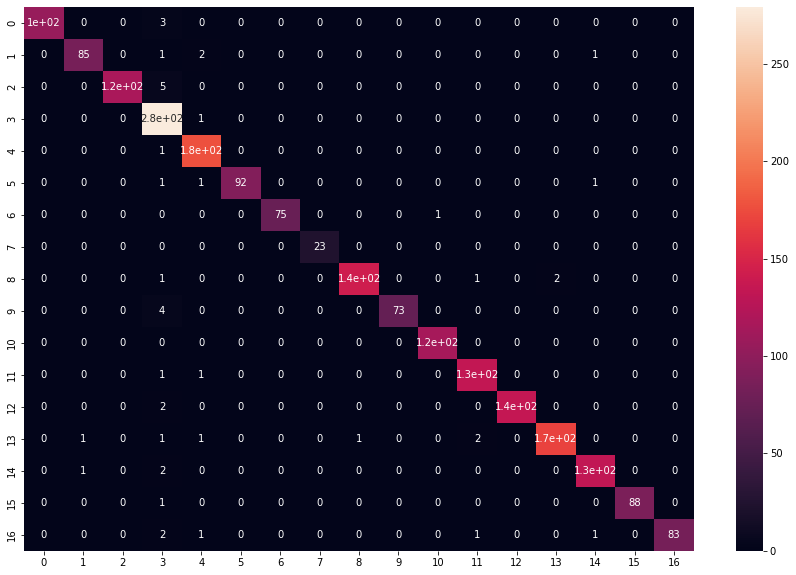

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [18]:
#all predictions are almost right!

# Predicting with some more data

In [34]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     #print("The langauge is in",lang[0]) # printing the language
     return lang[0]

In [35]:
predict("Hello, it's me")

'English'

In [36]:
predict("Bonjour, c'est moi")

'French'

In [31]:
predict("CEO of Voir Social Isobel@voirsocial.com")

The langauge is in English


# Insert language column to our dataset

In [48]:
data.insert(8, "language", "")
data

,Unnamed: 0,username,subscriptions,subscribers,likes,descriptions,E-mail,localisation,language,External-URL
0,0,@meredithduxbury,399,15600000.0,511000000.0,💄 MUA 💄\nIg: @meredithduxbury,NaN,,,NaN
1,1,@noeminikita,319,13400000.0,326400000.0,noeminikita@bwm-com.com\nInstagram: noeminikit...,"noeminikita@bwm-com.com ,",,,NaN
2,2,@mikaylanogueira,138,13000000.0,882100000.0,MUA | 24 | Masshole | Why aren’t you following...,NaN,,,NaN
3,4,@nadina_ioana,24,11600000.0,227400000.0,Business: contact@nadinaioana.com\nMy official...,"contact@nadinaioana.com ,",,,NaN
4,6,@kaelimaee,202,9600000.0,288000000.0,new apartment tour on my YT!!\nsd • 🕊🌿\nkaeli@...,"kaeli@palettemgmt.com ,",,,NaN
...,...,...,...,...,...,...,...,...,...,...
1393,1806,@cxnstvce,453,3056.0,118700.0,GOOD VIBES ONLY\nIg : cxnstvce,NaN,,,NaN
1394,1807,@marina_pmare,1127,3052.0,96000.0,Watch my story of living abroad\n4yrs in 🇮🇹\nN...,"collabs_mari@yahoo.com ,",Paris,,NaN
1395,1808,@bonjourlasmala,292,3037.0,10800.0,Je t’aide à gagner en visibilité sur les résea...,NaN,,,NaN
1396,1809,@geek.osphere,38,3031.0,153400.0,"👇🏻Vente de cosmétiques Disney, Geek, Kawaii👇🏻\...",NaN,,,NaN


# Add language to each row

In [49]:
import re
for i in range(len(data)) :
    
    text = str(data["descriptions"].iloc[i])
    lang = ''
    lang = predict(text)
    data["language"].loc[i]=lang

In [50]:
data

,Unnamed: 0,username,subscriptions,subscribers,likes,descriptions,E-mail,localisation,language,External-URL
0,0,@meredithduxbury,399,15600000.0,511000000.0,💄 MUA 💄\nIg: @meredithduxbury,NaN,,Danish,NaN
1,1,@noeminikita,319,13400000.0,326400000.0,noeminikita@bwm-com.com\nInstagram: noeminikit...,"noeminikita@bwm-com.com ,",,Portugeese,NaN
2,2,@mikaylanogueira,138,13000000.0,882100000.0,MUA | 24 | Masshole | Why aren’t you following...,NaN,,English,NaN
3,4,@nadina_ioana,24,11600000.0,227400000.0,Business: contact@nadinaioana.com\nMy official...,"contact@nadinaioana.com ,",,English,NaN
4,6,@kaelimaee,202,9600000.0,288000000.0,new apartment tour on my YT!!\nsd • 🕊🌿\nkaeli@...,"kaeli@palettemgmt.com ,",,English,NaN
...,...,...,...,...,...,...,...,...,...,...
1393,1806,@cxnstvce,453,3056.0,118700.0,GOOD VIBES ONLY\nIg : cxnstvce,NaN,,English,NaN
1394,1807,@marina_pmare,1127,3052.0,96000.0,Watch my story of living abroad\n4yrs in 🇮🇹\nN...,"collabs_mari@yahoo.com ,",Paris,English,NaN
1395,1808,@bonjourlasmala,292,3037.0,10800.0,Je t’aide à gagner en visibilité sur les résea...,NaN,,French,NaN
1396,1809,@geek.osphere,38,3031.0,153400.0,"👇🏻Vente de cosmétiques Disney, Geek, Kawaii👇🏻\...",NaN,,French,NaN


# To excel file

In [51]:
data.to_excel('my_dataset.xlsx')
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
